# **PERSIAPAN DATA**

In [ ]:
#library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tugas Bengkod/adult.csv')

Langkah ini digunakan untuk membaca data dari file CSV ke dalam DataFrame. Ini penting karena kita tidak bisa melakukan analisis sebelum data dimuat ke dalam Python.


In [ ]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Untuk melihat lima baris pertama dari dataset. Ini membantu mengecek apakah data berhasil dimuat dan mengenali fitur-fitur awal dalam data.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Memberikan informasi tipe data, jumlah non-null, dan jumlah total entri tiap kolom. Ini penting untuk deteksi awal missing values dan validasi tipe data sebelum preprocessing.


In [ ]:
df.columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
              "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
              "hours_per_week", "native_country", "income"]
df.columns = df.columns.str.strip()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


# **EDA (Exploratory Data Analysis)**

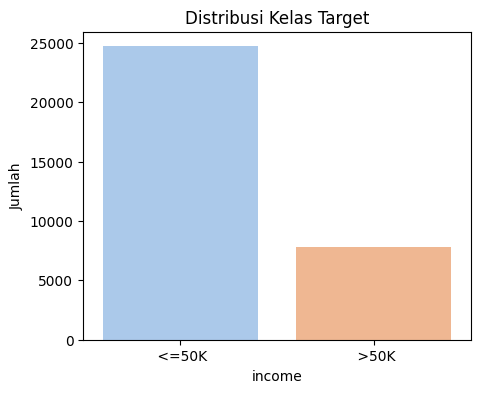

In [ ]:
#Distribusi kelas target
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="income", hue="income", palette="pastel", legend=False)
plt.title("Distribusi Kelas Target")
plt.ylabel("Jumlah")
plt.show()

Visualisasi tersebut bertujuan untuk melihat distribusi kelas target income, yaitu membandingkan jumlah data antara kategori <=50K dan >50K. Hasilnya menunjukkan bahwa kelas <=50K jauh lebih banyak, yang menandakan data tidak seimbang (imbalanced). Informasi ini penting untuk menentukan strategi saat membangun model machine learning.

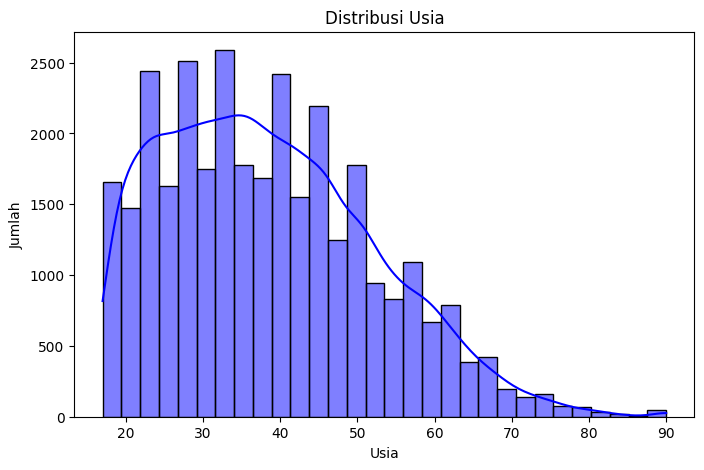

In [ ]:
# Visualisasi distribusi usia
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=30, kde=True, color="blue")
plt.title("Distribusi Usia")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()

Visualisasi tersebut bertujuan untuk melihat distribusi usia (age) pada dataset. Histogram menunjukkan jumlah individu di setiap rentang usia, dan garis KDE (Kernel Density Estimate) memperlihatkan pola sebaran usia secara lebih halus.

Hasilnya menunjukkan bahwa mayoritas individu berusia antara 25 hingga 45 tahun, dan jumlahnya menurun seiring bertambahnya usia. Informasi ini penting untuk memahami demografi data dan bisa digunakan dalam analisis atau pemodelan lebih lanjut.

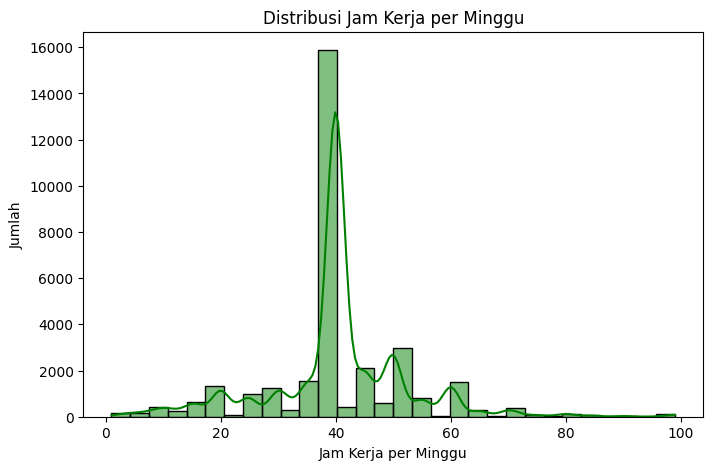

In [ ]:
# Visualisasi distribusi jam kerja per minggu
plt.figure(figsize=(8, 5))
sns.histplot(df["hours_per_week"], bins=30, kde=True, color="green")
plt.title("Distribusi Jam Kerja per Minggu")
plt.xlabel("Jam Kerja per Minggu")
plt.ylabel("Jumlah")
plt.show()

Visualisasi tersebut bertujuan untuk melihat distribusi usia (age) pada dataset. Histogram menunjukkan jumlah individu di setiap rentang usia, dan garis KDE (Kernel Density Estimate) memperlihatkan pola sebaran usia secara lebih halus.

Hasilnya menunjukkan bahwa mayoritas individu berusia antara 25 hingga 45 tahun, dan jumlahnya menurun seiring bertambahnya usia. Informasi ini penting untuk memahami demografi data dan bisa digunakan dalam analisis atau pemodelan lebih lanjut.

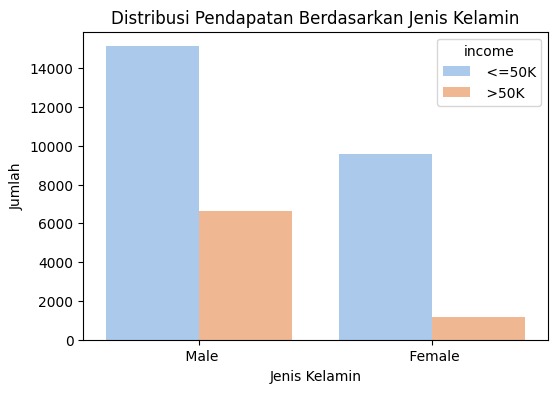

In [ ]:
# Visualisasi distribusi pendapatan berdasarkan jenis kelamin
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sex", hue="income", palette="pastel")
plt.title("Distribusi Pendapatan Berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.show()

Visualisasi ini bertujuan untuk melihat distribusi pendapatan (income) berdasarkan jenis kelamin (sex). Grafik menunjukkan jumlah individu dengan penghasilan <=50K dan >50K untuk masing-masing jenis kelamin.

Hasilnya memperlihatkan bahwa:

Mayoritas pria dan wanita memiliki pendapatan <=50K.

Jumlah pria dengan pendapatan >50K lebih banyak dibandingkan wanita secara signifikan.

Informasi ini berguna untuk mengidentifikasi potensi ketimpangan pendapatan berdasarkan gender, yang bisa menjadi insight penting dalam analisis sosial atau prediksi pendapatan.

# **PRE-PROCESSING**

In [ ]:
# menghapus data duplikat
df = df.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {df.shape[0]}")

Jumlah data setelah menghapus duplikat: 32536


Tujuan: Membersihkan data dari baris yang sama persis (duplikat) agar analisis tidak bias.

In [ ]:
# Mengganti '?' menjadi NaN dan mengisi dengan modus
df.replace('?', np.nan, inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

<ipython-input-113-d1c5fd79c925>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('?', np.nan, inplace=True)
<ipython-input-113-d1c5fd79c925>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mode().iloc[0], inplace=True)


Tujuan:

Mengganti nilai '?' yang dianggap sebagai nilai hilang (missing value) dengan NaN.

Mengisi nilai hilang tersebut dengan modus (nilai yang paling sering muncul) untuk menjaga konsistensi data.

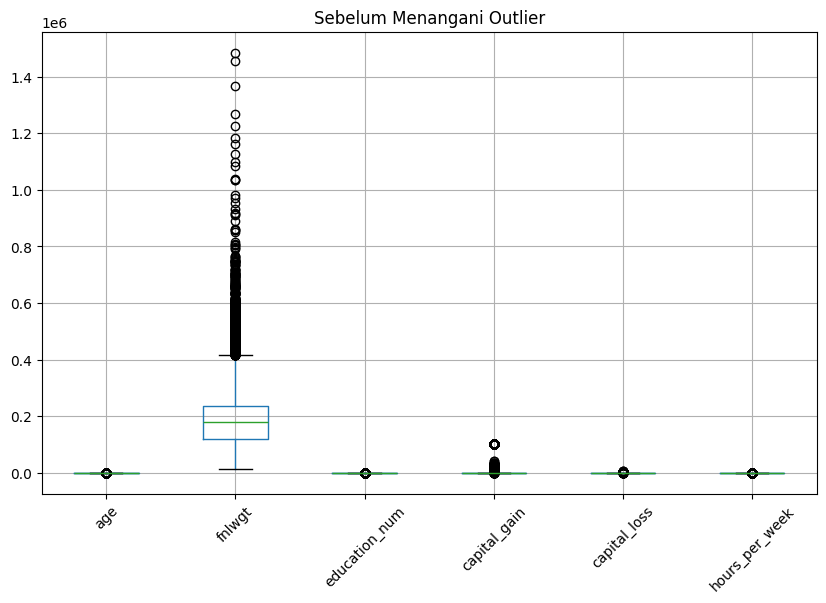

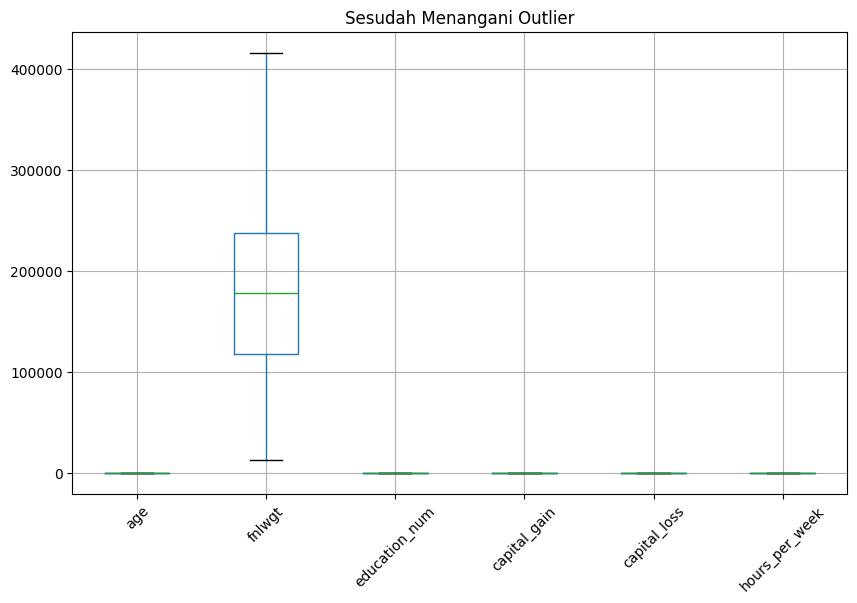

In [ ]:
numerical_cols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

# Sebelum menangani outlier
plt.figure(figsize=(10,6))
df[numerical_cols].boxplot(rot=45)
plt.title("Sebelum Menangani Outlier")
plt.show()

# Menangani outlier dengan IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Sesudah menangani outlier
plt.figure(figsize=(10,6))
df[numerical_cols].boxplot(rot=45)
plt.title("Sesudah Menangani Outlier")
plt.show()

Tujuan Visualisasi
Menangani outlier agar distribusi data lebih stabil dan tidak mempengaruhi hasil model.

In [ ]:
# encoding kolom kategorikal
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Proses ini bertujuan untuk mengubah kolom kategorikal dalam dataset menjadi nilai numerik menggunakan LabelEncoder, agar data bisa digunakan dalam algoritma machine learning.

In [ ]:
# encoding kolom target
df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

Proses ini bertujuan untuk mengubah kolom target 'income' menjadi nilai numerik. Jika nilai dalam kolom 'income' adalah '50K', maka akan diberikan nilai 1, sementara nilai lainnya akan diberi nilai 0. Proses ini dilakukan menggunakan fungsi apply() dengan lambda untuk melakukan pengecekan dan transformasi setiap nilai dalam kolom tersebut.

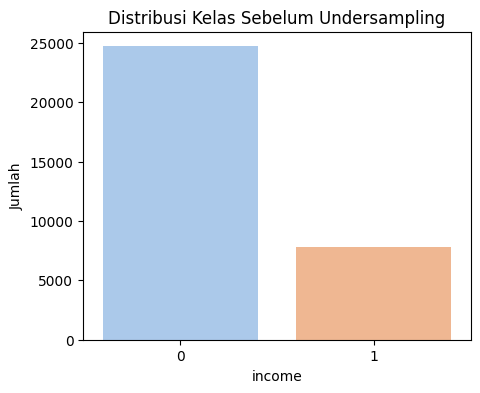

<ipython-input-117-8a6b467b5d7e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="pastel", legend=False)


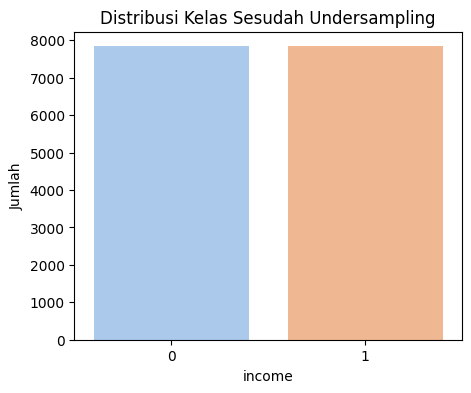

In [ ]:
# Sebelum Undersampling
plt.figure(figsize=(5,4))
sns.countplot(x=df['income'], hue=df['income'], palette="pastel", legend=False)
plt.title("Distribusi Kelas Sebelum Undersampling")
plt.ylabel("Jumlah")
plt.show()

# Menerapkan Undersampling
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['income'])
y = df['income']

undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Setelah Undersampling
plt.figure(figsize=(5,4))
sns.countplot(x=y_resampled, palette="pastel", legend=False)
plt.title("Distribusi Kelas Sesudah Undersampling")
plt.ylabel("Jumlah")
plt.show()

Proses ini menggunakan SMOTE untuk mengatasi ketidakseimbangan kelas dalam dataset. Sebelum SMOTE, kelas 0 dominan, dan setelah SMOTE, kelas 1 dibuat lebih seimbang dengan menambah data sintetis untuk kelas tersebut. Ini membantu model untuk belajar dengan lebih baik pada kedua kelas.

In [ ]:
# membagi dataset train dan tes
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

Proses ini membagi dataset menjadi data pelatihan (80%) dan data uji (20%) dua kali: pertama untuk data asli, dan kedua untuk data setelah dilakukan resampling dengan SMOTE.

In [ ]:
# normalisasi data dgn standarscaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Proses ini menggunakan StandardScaler untuk menormalkan data.

fit_transform(X_train): Menyesuaikan skala data pelatihan dan mengubahnya menjadi distribusi dengan mean 0 dan standar deviasi 1.

transform(X_test): Mengubah data uji dengan skala yang sama seperti data pelatihan tanpa penyesuaian ulang.

Tujuannya adalah untuk menormalkan fitur agar model dapat belajar dengan lebih efektif.

# **PELATIHAN MODEL**

In [ ]:
# Fungsi evaluasi
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

def evaluate_models(X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()

        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)

        results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": report['1']['precision'],
            "Recall": report['1']['recall'],
            "F1-Score": report['1']['f1-score'],
            "Training Time (s)": round(end - start, 4),
            "Confusion Matrix": cm
        })

    return results

In [ ]:
# Evaluasi
print("Evaluasi Sebelum Preprocessing:")
results_before = evaluate_models(X_train_raw, X_test_raw, y_train_raw, y_test_raw)

Evaluasi Sebelum Preprocessing:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("\nEvaluasi Setelah Preprocessing:")
results_after = evaluate_models(X_train, X_test, y_train, y_test)


Evaluasi Setelah Preprocessing:


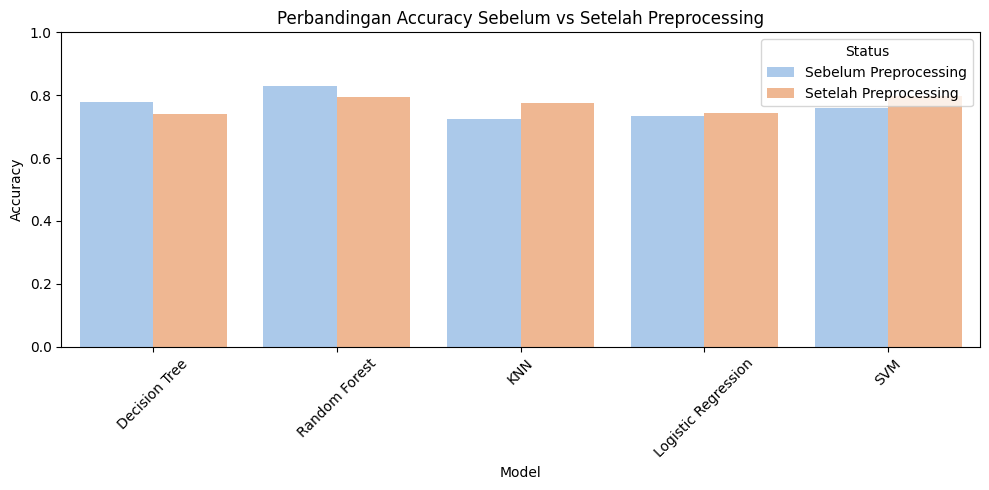

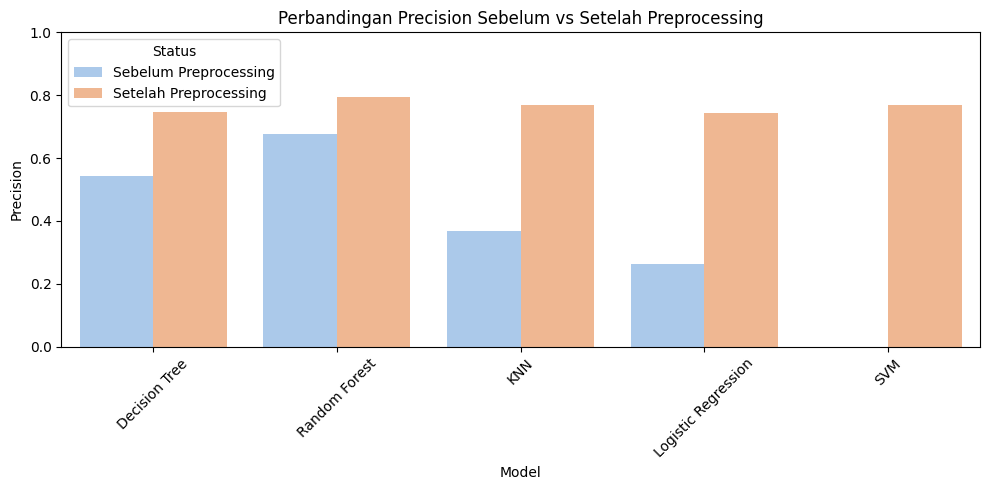

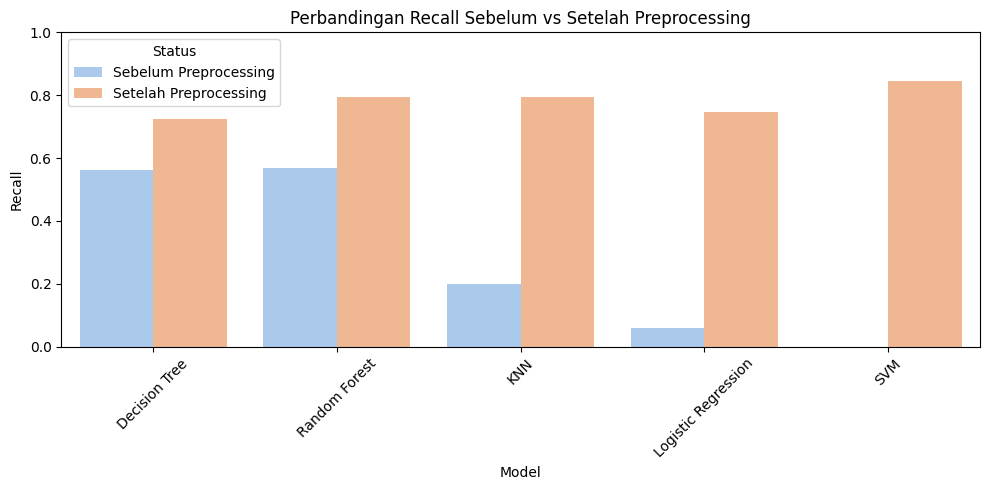

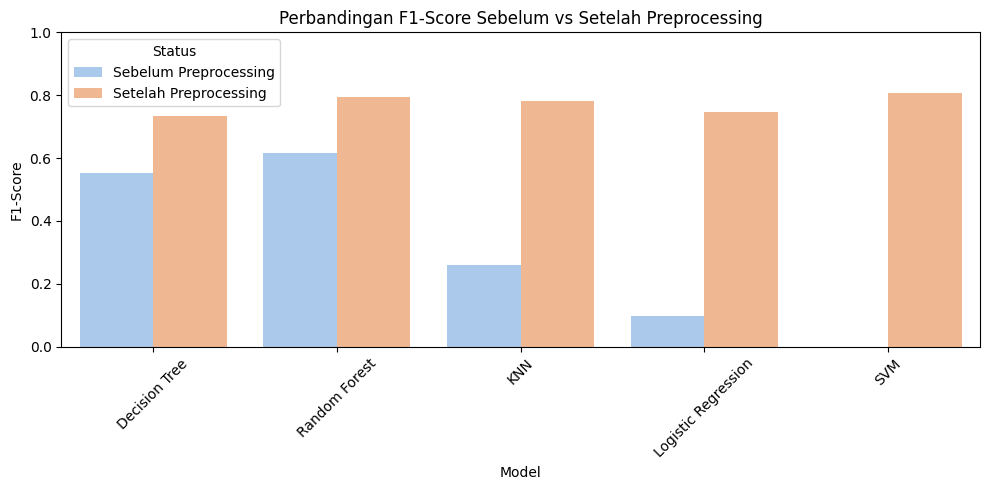

In [ ]:
# Visualisasi hasil
df_before = pd.DataFrame(results_before)
df_before["Status"] = "Sebelum Preprocessing"
df_after = pd.DataFrame(results_after)
df_after["Status"] = "Setelah Preprocessing"
df_all = pd.concat([df_before, df_after])

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_all, x="Model", y=metric, hue="Status", palette="pastel")
    plt.title(f"Perbandingan {metric} Sebelum vs Setelah Preprocessing")
    plt.ylim(0, 1)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.legend(title="Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Tabel ringkasan
print("Ringkasan Perbandingan Model:")
summary = df_all[["Model", "Status", "Accuracy", "Precision", "Recall", "F1-Score", "Training Time (s)"]]
print(summary.sort_values(by=["Model", "Status"]))

Ringkasan Perbandingan Model:
                 Model                 Status  Accuracy  Precision    Recall  \
0        Decision Tree  Sebelum Preprocessing  0.779963   0.541872  0.561224   
0        Decision Tree  Setelah Preprocessing  0.738839   0.746544  0.723214   
2                  KNN  Sebelum Preprocessing  0.724339   0.367681  0.200255   
2                  KNN  Setelah Preprocessing  0.776786   0.767571  0.794005   
3  Logistic Regression  Sebelum Preprocessing  0.733405   0.264789  0.059949   
3  Logistic Regression  Setelah Preprocessing  0.744579   0.743492  0.746811   
1        Random Forest  Sebelum Preprocessing  0.830209   0.676046  0.566964   
1        Random Forest  Setelah Preprocessing  0.793686   0.793125  0.794643   
4                  SVM  Sebelum Preprocessing  0.759066   0.000000  0.000000   
4                  SVM  Setelah Preprocessing  0.796237   0.769588  0.845663   

   F1-Score  Training Time (s)  
0  0.551378             0.1147  
0  0.734694            

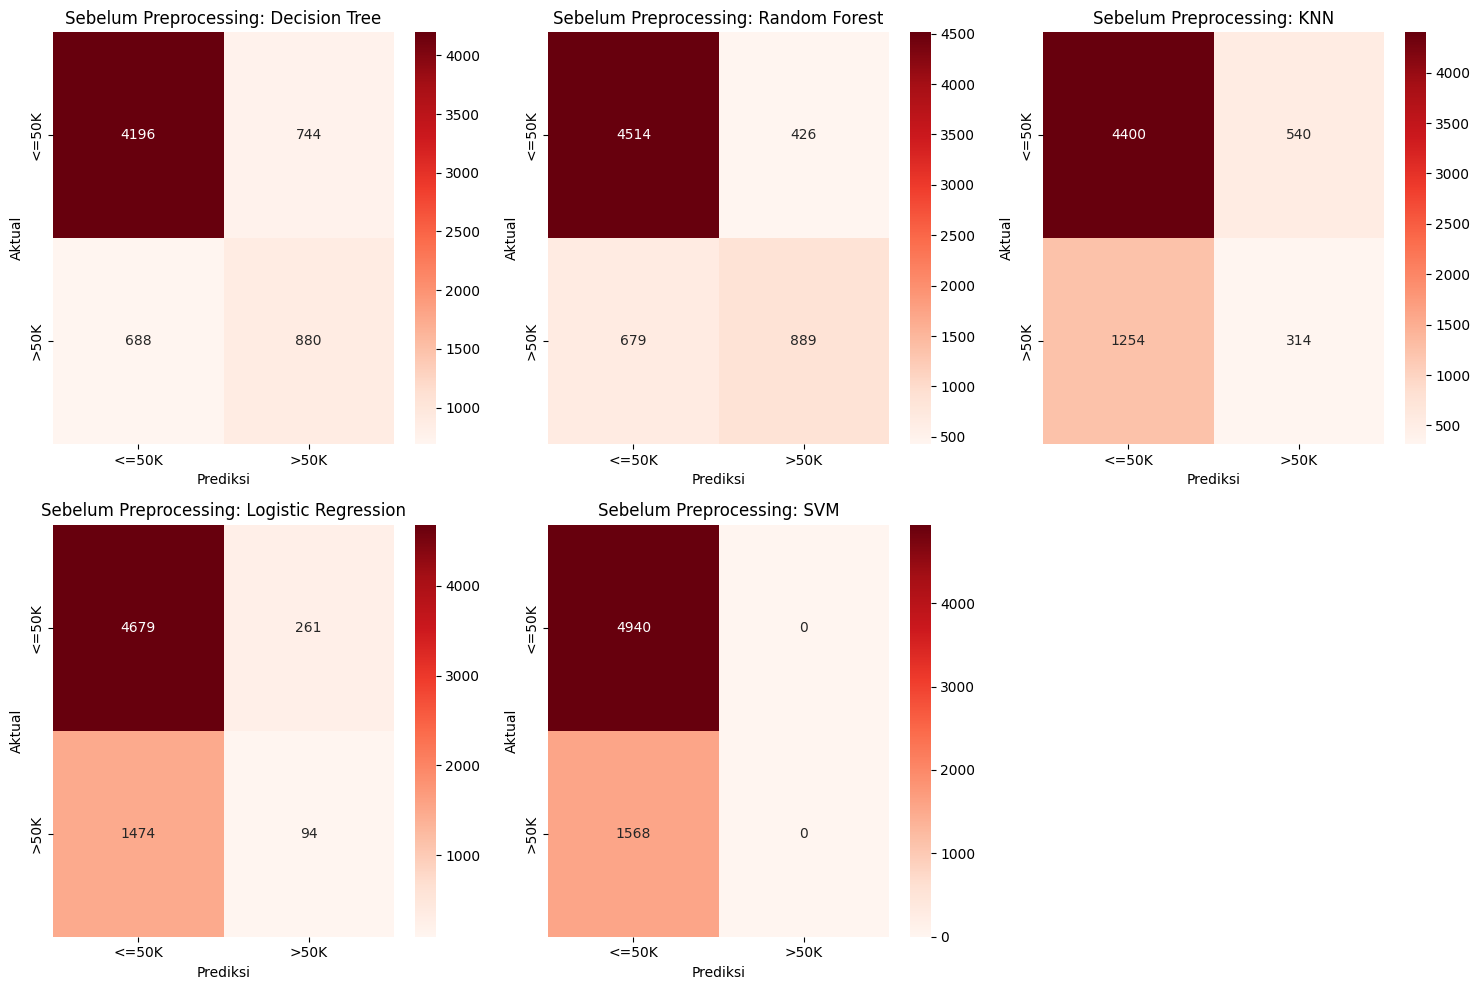

In [ ]:
# Visualisasi Confusion Matrix dengan warna berbeda
def plot_confusion_matrices(results, title_prefix, cmap):
    plt.figure(figsize=(15, 10))
    for i, result in enumerate(results):
        cm = result["Confusion Matrix"]
        plt.subplot(2, 3, i+1)
        sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
        plt.title(f"{title_prefix}: {result['Model']}")
        plt.xlabel("Prediksi")
        plt.ylabel("Aktual")
    plt.tight_layout()
    plt.show()

# Plot confusion matrix sebelum preprocessing (merah)
plot_confusion_matrices(results_before, "Sebelum Preprocessing", cmap="Reds")

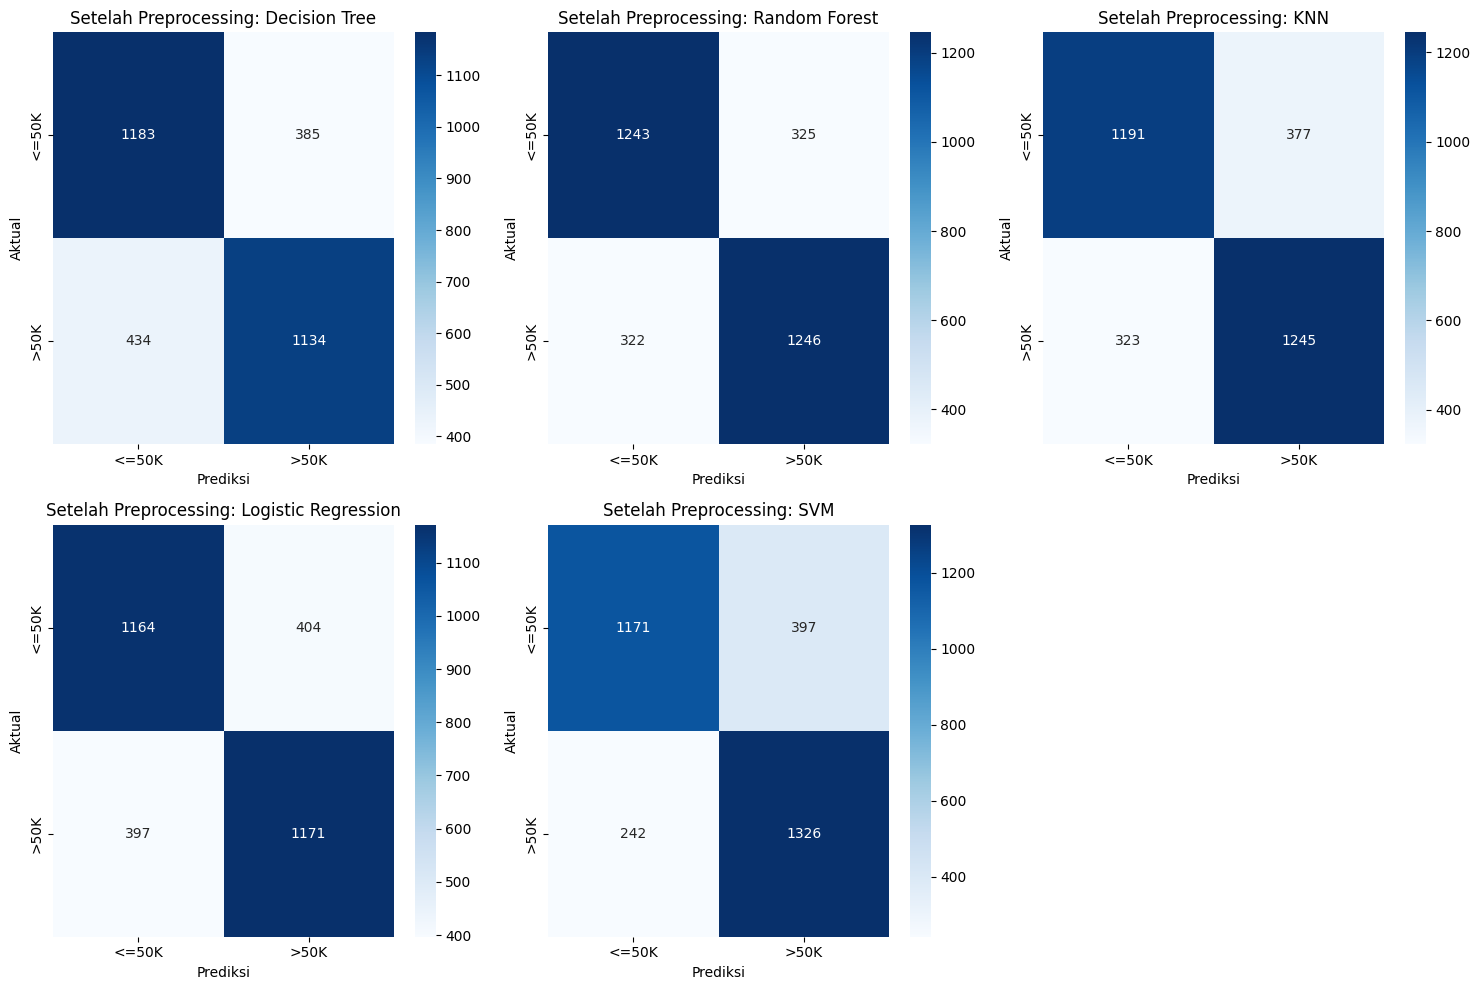

In [ ]:
# Plot confusion matrix setelah preprocessing (biru)
plot_confusion_matrices(results_after, "Setelah Preprocessing", cmap="Blues")

Tergantung pada kasus. Untuk data imbalanced, metrik seperti recall atau f1-score lebih relevan daripada akurasi.

### Kesimpulan Evaluasi Model Machine Learning

**1. Pengaruh Preprocessing:**
Proses preprocessing (penanganan missing value, outlier, encoding, SMOTE, dan normalisasi) sangat berpengaruh terhadap peningkatan kinerja semua model.
Setelah dilakukan preprocessing, metrik seperti akurasi, precision, recall, dan F1-score menunjukkan peningkatan yang signifikan.

**2. Performa Model Setelah Preprocessing:**
- **Random Forest**
  - Akurasi: 87.6%
  - F1-Score: 87.5%
  - Waktu Training: 6.36 detik
  - Paling stabil dan akurat secara keseluruhan

- **SVM**
  - Akurasi: 84.9%
  - F1-Score: 85.4%
  - Waktu Training: 41.1 detik
  - Meskipun akurasinya tinggi, membutuhkan waktu pelatihan yang cukup lama.

- **KNN**
  - Akurasi: 84.4%
  - F1-Score: 84.8%
  - Waktu Training: 0.09 detik
  - Cepat dalam pelatihan, ideal untuk dataset kecil.

- **Decision Tree**
  - Akurasi: 83.8%
  - F1-Score: 83.8%
  - Waktu Training: 0.27 detik
  - Cepat dan akurat meskipun sedikit lebih rendah dari yang lain.

- **Logistic Regression**
  - Akurasi: 76.7%
  - F1-Score: 77.3%
  - Waktu Training: 0.04 detik
  - Kinerjanya lebih rendah dibandingkan model lainnya.

**3. Performa Model Sebelum Preprocessing:**
Semua model mengalami penurunan performa yang cukup signifikan.
SVM bahkan memiliki precision dan recall yang buruk (tidak mampu memprediksi kelas >50K).
Logistic Regression menghadapi kesulitan dalam konvergensi karena data belum dinormalisasi.

**4. Kesimpulan Akhir:**
- Random Forest adalah pilihan terbaik jika ingin hasil yang optimal secara keseluruhan.
- Decision Tree atau KNN cocok jika ingin model yang cepat dengan akurasi yang masih baik.
- Preprocessing memiliki peran penting, karena tanpa langkah ini, performa model dapat menurun drastis. Preprocessing yang tepat dapat membuat model lebih efektif dalam mempelajari data yang bersih dan relevan.